Time Series Analysis(TSA) is a method of analyzing data points collected over time to identify patterns,trends,and seasonal variations. it is used to forecast future values based on historical data.

In [9]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

Loading and Viewing data

In [10]:
temp_df=pd.read_csv(r"C:\Users\DELL\Downloads\DailyDelhiClimateTrain.csv")

In [11]:
temp_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [12]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


Setting data as index

In [13]:
#checking for nulls in date column
print(temp_df[temp_df['date'].isna()])
temp_df.info()

Empty DataFrame
Columns: [date, meantemp, humidity, wind_speed, meanpressure]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [14]:
temp_df.set_index("date",inplace=True)
temp_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


Visualize

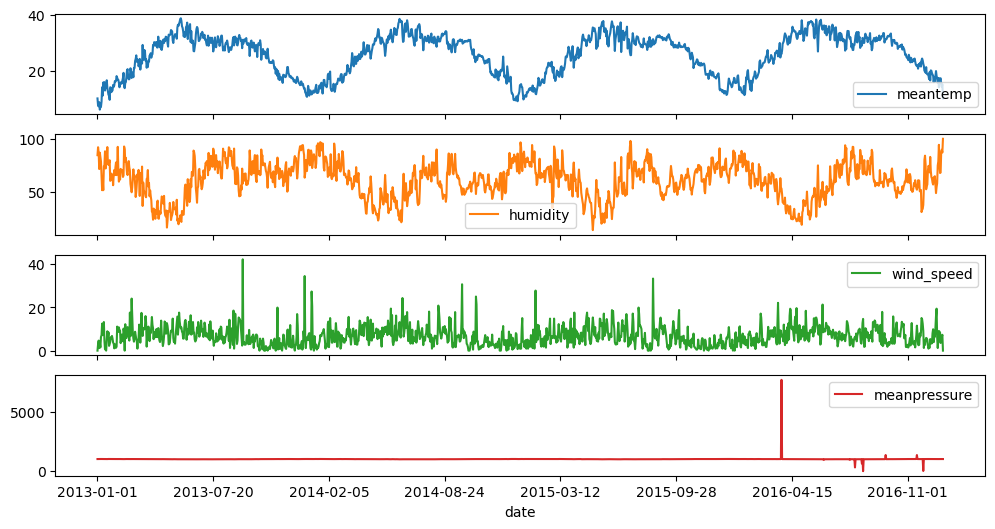

In [15]:
temp_df.plot(figsize=(12,6),subplots=True)
plt.show()

conclusion: weather data analysis the graph indicates the analysis of meteorological parameter such as mean temp
mean pressure: the buttom graph seems relatively stable

Stationarity

A time series is stationary if its statistical properties (mean,variance,autocorrelation)remain constant over time
hypothesis of the ADF Test:
null Hypothesis:the time series has a unit root
alternate hypothesis : the time series does not have a unit root


interpretting ADF Test Results
if the p-value is less than 0.005,reject hypothesis---->the series is stationary


In [16]:
adfuller_result=adfuller(temp_df['meantemp'])

In [17]:
print(adfuller_result)

(-2.0210690559206728, 0.27741213723016056, 10, 1451, {'1%': -3.4348647527922824, '5%': -2.863533960720434, '10%': -2.567831568508802}, 5423.895746470953)


In [18]:
if adfuller_result[1]<0.05:
    print("Stationary")
else:
    print("NOn-Stationary")

NOn-Stationary


Differencing to Remove Trend; if the series is non-Stationary ,apply differencing.

differencing is a technique used to make a non-stationary time series stationary by removing trends or seasonality. it involves substracting the previous observation from the current observation 

temprature=[20,21,22,24,25,27,28,27]
Differnece=[1,1,2,1,2,1,-1]
the new series fluctuates around zero -2 to 2


Differencing

In [19]:
temp_df['meantemp_dff']=temp_df['meantemp'].diff()
temp_df.head()

,meantemp,humidity,wind_speed,meanpressure,meantemp_dff
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667


In [20]:
adfuller_result_afterdiff=adfuller(temp_df['meantemp_dff'].dropna())
if adfuller_result_afterdiff[1]>0.005:
    print("non stationary")
else:
    print("stationary")

stationary


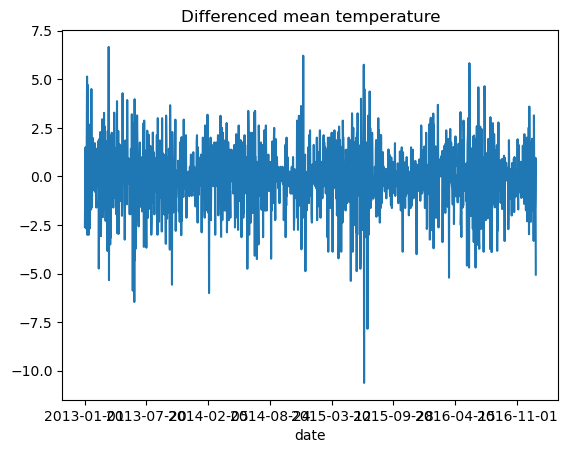

In [21]:
temp_df['meantemp_dff'].plot(title="Differenced mean temperature")
plt.show()

# Use seasonal decomposition to analyze trend,seasonality,and residuals

seasonal decomposition is a technique used to break a time series into three main components:
Trend-the long-term pattern(increase or decrease over time)
seasonally-the repeating patterns at fixed intervals(eg. monthly sales spikes)
Residual(the random variations that are not exolained by trend or seasonality.

interpretting the output

original Series-the raw time series data.
trend component-the general direction of the data over time.
seasonal component- the repeating patterns.

In [24]:
decomp=seasonal_decompose(temp_df['meantemp'],model='additive',period=365)

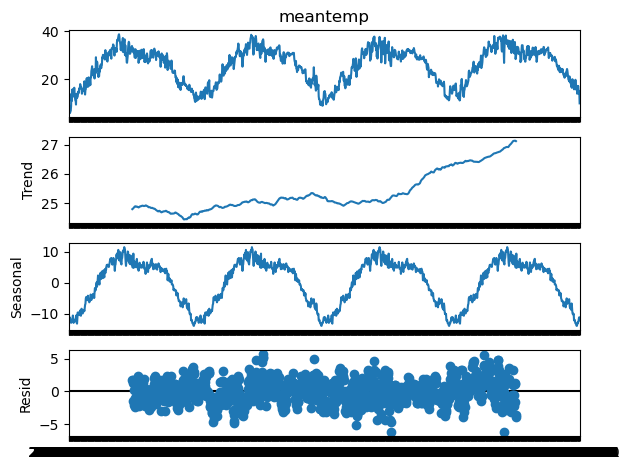

In [23]:
decomp.plot()
plt.show()

ARMA

In [25]:
len(temp_df)

1462

In [26]:
print(len(temp_df)*0.8)

1169.6000000000001


In [31]:
train=temp_df.iloc[0:1169]
test=temp_df.iloc[1169:]
len(test)

293

In [29]:
mymodel=ARIMA(train['meantemp'],order=(1,1,1,))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [30]:
mymodel=mymodel.fit()

In [38]:
forecast=mymodel.forecast(steps=len(test))
print(forecast.head())


2016-03-15    22.826205
2016-03-16    23.085687
2016-03-17    23.234913
2016-03-18    23.320731
2016-03-19    23.370084
Freq: D, Name: predicted_mean, dtype: float64


In [43]:
test['forecast']=forecast
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12336\2406814425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast']=forecast


,meantemp,humidity,wind_speed,meanpressure,meantemp_dff,forecast
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,22.826205
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,23.085687
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,23.234913
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,23.320731
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,23.370084


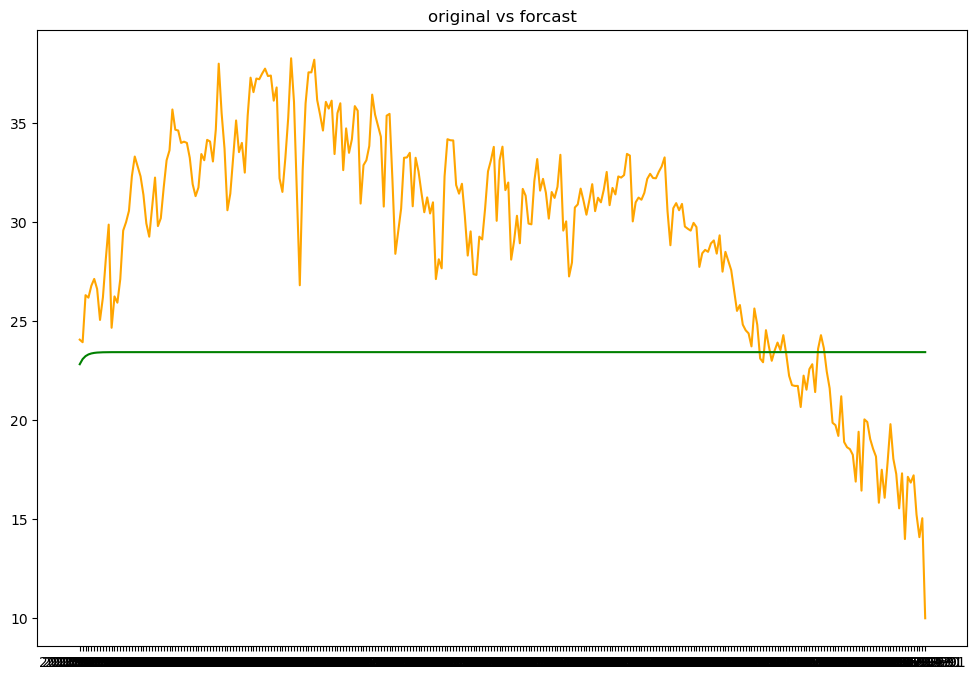

In [47]:
plt.figure(figsize=(12,8))
plt.plot(test.index,test['meantemp'],color='orange',label="original")
plt.plot(test.index,test['forecast'],color='green',label="forecast")
plt.title("original vs forcast")
plt.show()

In [51]:
mymodel=ARIMA(train['meantemp'],order=(1,1,1,))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [52]:
mymodel=mymodel.fit()

In [53]:
forecast=mymodel.forecast(steps=len(test))
print(forecast.head())

2016-03-15    22.826205
2016-03-16    23.085687
2016-03-17    23.234913
2016-03-18    23.320731
2016-03-19    23.370084
Freq: D, Name: predicted_mean, dtype: float64


In [54]:
test['forecast']=forecast
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12336\2406814425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast']=forecast


,meantemp,humidity,wind_speed,meanpressure,meantemp_dff,forecast
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,22.826205
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,23.085687
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,23.234913
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,23.320731
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,23.370084


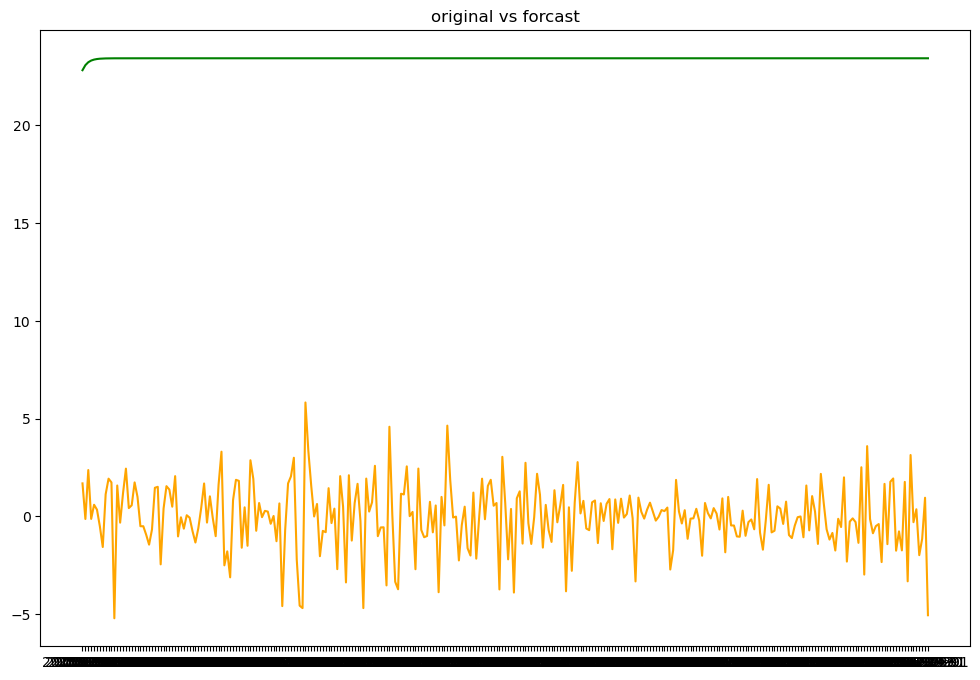

In [55]:
plt.figure(figsize=(12,8))
plt.plot(test.index,test['meantemp_dff'],color='orange',label="original")
plt.plot(test.index,test['forecast'],color='green',label="forecast")
plt.title("original vs forcast")
plt.show()

In [58]:
mymodel_dff=ARIMA(train['meantemp_dff'],order=(1,1,1,))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [59]:
mymodel_dff=mymodel_dff.fit()

In [60]:
forecast_dff=mymodel_dff.forecast(steps=len(test))
print(forecast_dff.head())

2016-03-15    0.322914
2016-03-16   -0.040400
2016-03-17    0.019656
2016-03-18    0.009729
2016-03-19    0.011370
Freq: D, Name: predicted_mean, dtype: float64


In [61]:
test['forecast_dff']=forecast_dff
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12336\72905532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast_dff']=forecast_dff


,meantemp,humidity,wind_speed,meanpressure,meantemp_dff,forecast,forecast_dff
date,,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,22.826205,0.322914
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,23.085687,-0.040400
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,23.234913,0.019656
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,23.320731,0.009729
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,23.370084,0.011370


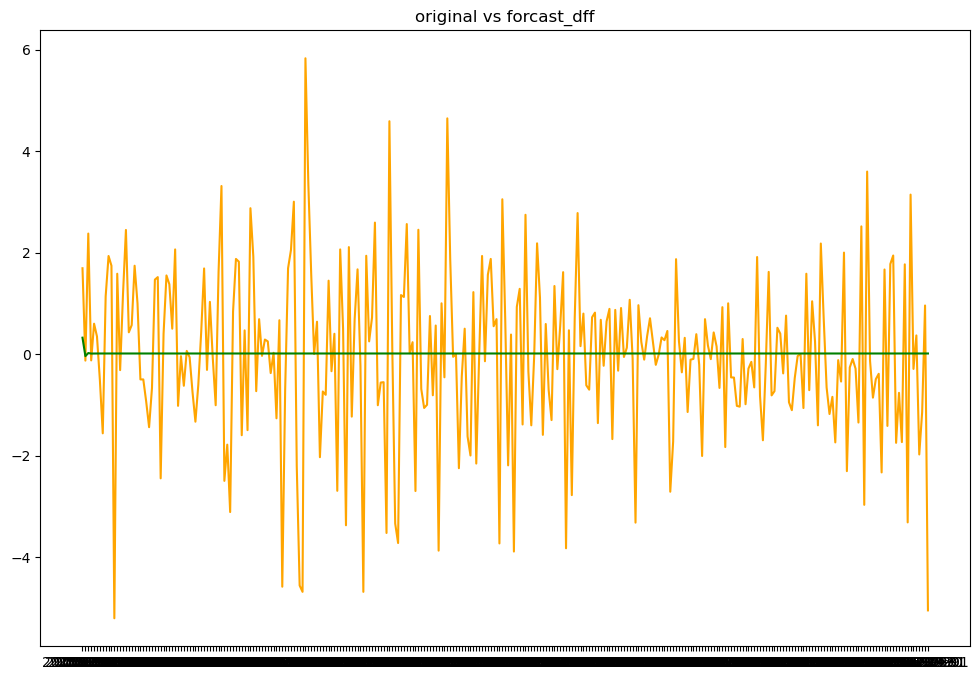

In [62]:
plt.figure(figsize=(12,8))
plt.plot(test.index,test['meantemp_dff'],color='orange',label="original")
plt.plot(test.index,test['forecast_dff'],color='green',label="forecast_dff")
plt.title("original vs forcast_dff")
plt.show()

In [ ]:
15 mar,original value =24.066667,model says there is -